In [2]:
# 3rd party
from pandas.plotting import register_matplotlib_converters

# custom
from get_ib_data import (
    get_matched_etfs
)

from etf_allocation_analysis import (
    get_etf_data,
    get_returns,
    split_to_asset_class,
    risk_vs_ret_plot,
    filter_symbols,
    analyse_allocation,
    correlation_df,
    print_stacked_etfs_data
)

In [3]:
%matplotlib notebook
register_matplotlib_converters()

In [4]:
print('Getting all ETF data from CSVs...')
all_etf_data = get_etf_data()
print('... done')

print('Matching IB and Investpy symbols...')
matched_etfs = get_matched_etfs()
print('... done')

Getting all ETF data from CSVs...
... done
Matching IB and Investpy symbols...
... done


In [5]:
# get interesting commodity ETFs
etfs_by_class = split_to_asset_class(matched_etfs, all_etf_data)
commodity_etfs = {s:all_etf_data[s] for s in etfs_by_class['commodity']}
commodity_results = get_returns(commodity_etfs)
filtered_com_etfs = filter_symbols(commodity_results, returns=12, risk=20, years=3)
print('Filtered commodity ETFs:')
for ek, ev in filtered_com_etfs.items():
    print(ek, ev)

No of symbols with class: unknown is 1
No of symbols with class: other is 180
No of symbols with class: currency is 72
No of symbols with class: commodity is 520
No of symbols with class: bond is 969
No of symbols with class: equity is 3703
Filtered commodity ETFs:
CHGX {'years': [2018, 2019, 2020], 'yearly_cum_rets': [-5.66, 31.81, 15.15], 'avg_annualized_ret': 12.71, 'risk': 18.77}
EWG2 {'years': [2018, 2019, 2020], 'yearly_cum_rets': [2.36, 20.49, 19.51], 'avg_annualized_ret': 13.81, 'risk': 10.2}
SPAL {'years': [2016, 2017, 2018, 2019, 2020], 'yearly_cum_rets': [22.75, 45.85, 13.85, 50.88, 17.84], 'avg_annualized_ret': 29.37, 'risk': 16.94}
SPDM {'years': [2016, 2017, 2018, 2019, 2020], 'yearly_cum_rets': [51.64, 38.23, 22.92, 44.61, 21.44], 'avg_annualized_ret': 35.24, 'risk': 13.29}
IPDM {'years': [2016, 2017, 2018, 2019, 2020], 'yearly_cum_rets': [51.64, 38.23, 22.92, 44.61, 21.44], 'avg_annualized_ret': 35.24, 'risk': 13.29}


<IPython.core.display.Javascript object>


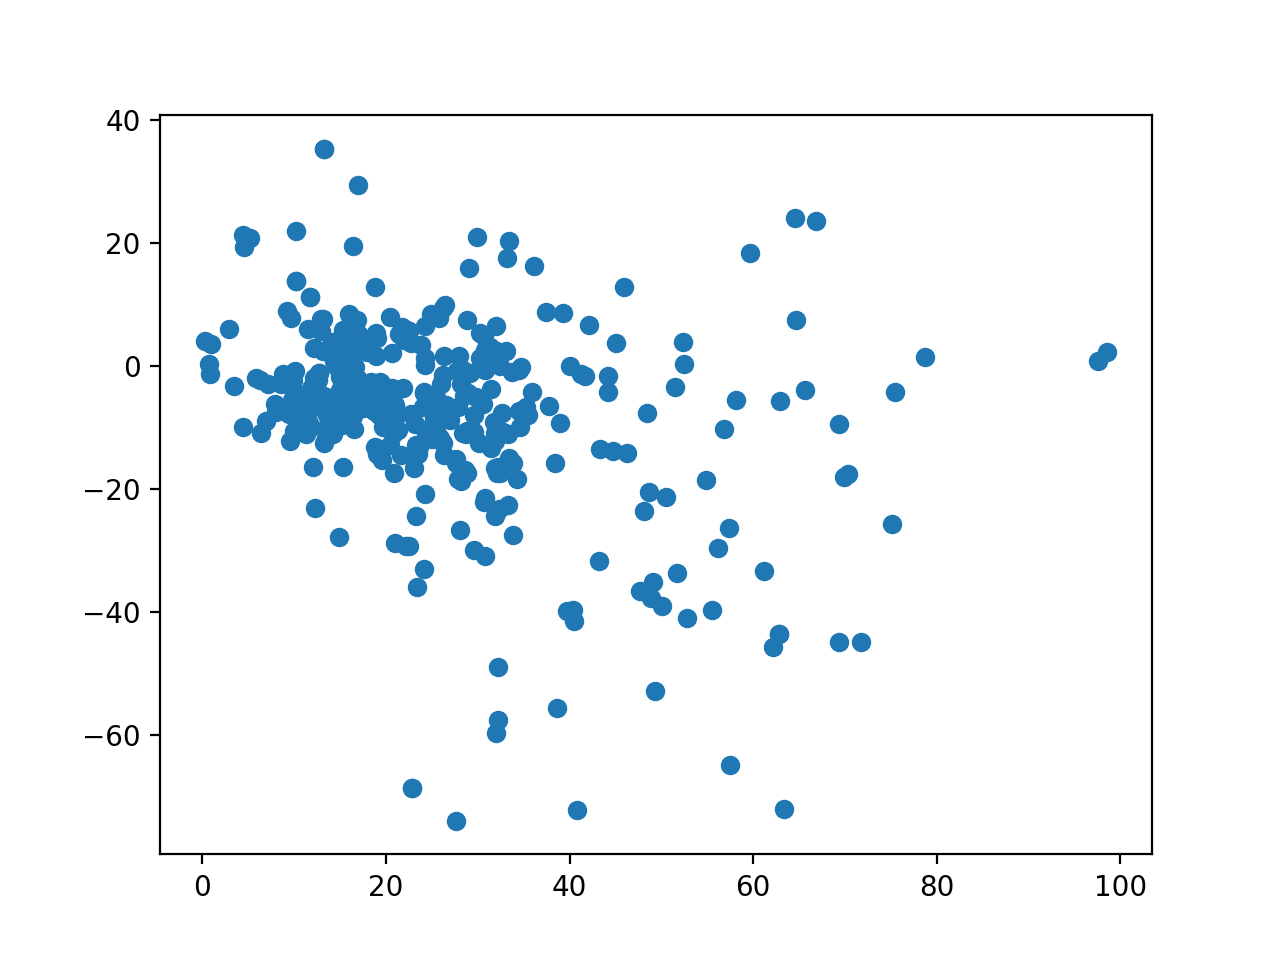

In [5]:
etfs_lst = []
etfs_rets = []
etfs_risk = []
for etf, res in commodity_results.items():
    etf_ret = res['avg_annualized_ret']    
    etfs_lst.append(etf)
    etfs_rets.append(etf_ret)
    etfs_risk.append(res['risk'])
risk_vs_ret_plot(etfs_risk, etfs_rets, etfs_lst)

In [6]:
# get interesting equity ETFs
equity_etfs = {s:all_etf_data[s] for s in etfs_by_class['equity']}
equity_results = get_returns(equity_etfs)
filtered_eq_etfs = filter_symbols(equity_results, returns=15, risk=10, years=5)
print('Filtered equity ETFs:')
for ek, ev in filtered_eq_etfs.items():
    print(ek, ev)

/Users/slaw/osobiste/trading/long_term/etf_allocation_analysis.py:244: RuntimeWarning: invalid value encountered in double_scalars
  cum_ret = round(((final_price/init_price) - 1)*100, 2)


Filtered equity ETFs:
HXS {'years': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'yearly_cum_rets': [14.31, 35.09, 25.01, 19.42, 9.97, 12.98, 2.87, 25.34, 10.53], 'avg_annualized_ret': 16.92, 'risk': 9.88}
IWFM {'years': [2015, 2016, 2017, 2018, 2019, 2020], 'yearly_cum_rets': [9.09, 27.35, 20.27, 37.01, 23.52, 22.03], 'avg_annualized_ret': 22.93, 'risk': 9.13}


<IPython.core.display.Javascript object>


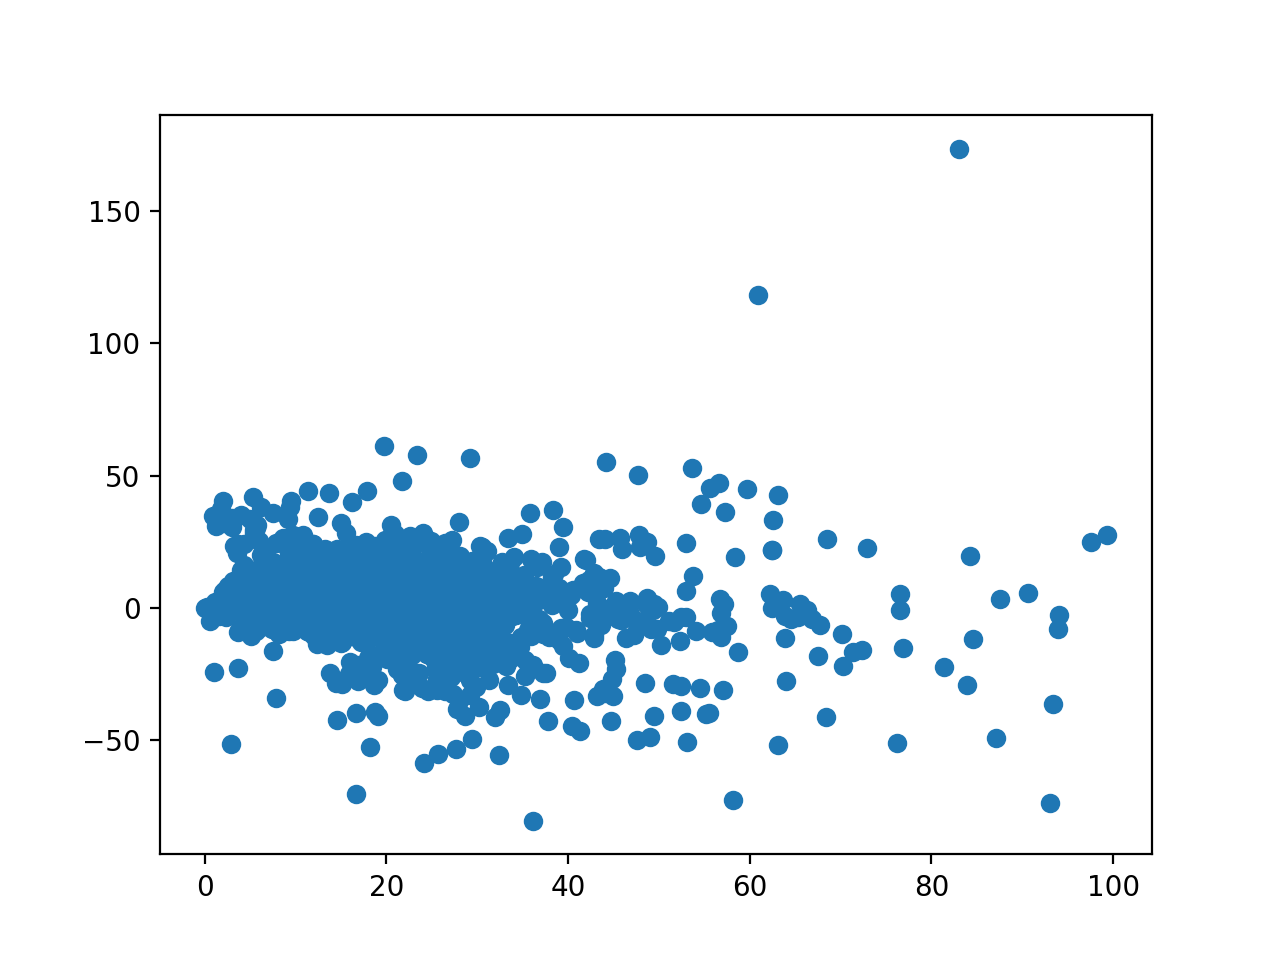

In [7]:
etfs_lst = []
etfs_rets = []
etfs_risk = []
for etf, res in equity_results.items():
    etf_ret = res['avg_annualized_ret']    
    etfs_lst.append(etf)
    etfs_rets.append(etf_ret)
    etfs_risk.append(res['risk'])
risk_vs_ret_plot(etfs_risk, etfs_rets, etfs_lst)

In [37]:
# ALLOCATION ANALYSIS

# manually selected ETFs
selected_etfs = {
    'bond': ['SYB4', 'SAAA'],
    'equity': ['GBDV', 'IDJG', 'HXS', 'IWFM', 'ICLN', 'EDEN'],
    'commodity': ['SPAL', 'IPDM', 'CHGX', 'EWG2']
}

# % split between asset classes 
splits = [
    {'bond': 40, 'equity': 40, 'commodity': 20},
    {'bond': 50, 'equity': 30, 'commodity': 20},
    {'bond': 30, 'equity': 50, 'commodity': 20},
    {'bond': 45, 'equity': 45, 'commodity': 10},
    {'bond': 40, 'equity': 50, 'commodity': 10},
    {'bond': 30, 'equity': 60, 'commodity': 10},
    {'bond': 35, 'equity': 60, 'commodity': 5},
]

fixed_symbols = ['SYB4', 'SAAA', 'GBDV', 'IDJG']

amount = 30000

selected_etfs_symbols = [sym for lst in selected_etfs.values() for sym in lst]
etfs_real_results = get_returns({s:all_etf_data[s] for s in selected_etfs_symbols})

alcs_results = analyse_allocation(
    selected_etfs=selected_etfs,
    splits=splits,
    amount=amount,
    etfs_real_results=etfs_real_results,
    fixed_symbols=fixed_symbols,
)

sorted_res = sorted(
    [(k, v[0], v[1]) for k,v in alcs_results.items()]
    , key=lambda x: (x[0], -x[1])
)

for r in sorted_res:
    print(f'{r[0]}: Ret:{r[1]}, Risk:{r[2]}')

    
    
"""
Note: 
bo50|eq50_22_SAAA|SYB4|GBDV|IDJG: Ret:3.443308376771399, Risk:8.222

new candidates:
bo40|co20|eq40_213_SYB4|SAAA|IPDM|IDJG|GBDV|IWFM: Ret:22.324120059714758, Risk:14.046999999999997
bo50|co20|eq30_212_SYB4|SAAA|IPDM|IDJG|GBDV: Ret:17.75913457309789, Risk:8.196

bo50|co20|eq30_213_SYB4|SAAA|IPDM|IDJG|GBDV|ICLN: Ret:18.744073598151463, Risk:10.913
bo50|co20|eq30_213_SYB4|SAAA|IPDM|IDJG|GBDV|IWFM: Ret:21.508873329013277, Risk:13.135  <- this one
(note, ICLN and IWFM have the same ESG rating A)

bo50|co20|eq30_213_SYB4|SAAA|IPDM|IDJG|GBDV|EDEN: Ret:20.872679416614968, Risk:17.644
(this one seems to be more volotile/risky but it has AAA ESG rating)

""";

bo30|co10|eq60_212_SYB4|SAAA|CHGX|IDJG|GBDV: Ret:6.623607675445868, Risk:11.635000000000002
bo30|co10|eq60_212_SYB4|SAAA|EWG2|IDJG|GBDV: Ret:6.263020397053997, Risk:14.270999999999997
bo30|co10|eq60_212_SYB4|SAAA|IPDM|IDJG|GBDV: Ret:13.109585160740906, Risk:14.103
bo30|co10|eq60_212_SYB4|SAAA|SPAL|IDJG|GBDV: Ret:10.986419221544349, Risk:10.388
bo30|co10|eq60_213_SYB4|SAAA|CHGX|IDJG|GBDV|EDEN: Ret:10.45866928193735, Risk:19.557000000000002
bo30|co10|eq60_213_SYB4|SAAA|CHGX|IDJG|GBDV|HXS: Ret:9.144588956413994, Risk:13.109
bo30|co10|eq60_213_SYB4|SAAA|CHGX|IDJG|GBDV|ICLN: Ret:6.531055633133174, Risk:25.151
bo30|co10|eq60_213_SYB4|SAAA|CHGX|IDJG|GBDV|IWFM: Ret:12.513820124552348, Risk:14.181000000000001
bo30|co10|eq60_213_SYB4|SAAA|EWG2|IDJG|GBDV|EDEN: Ret:7.35838806340215, Risk:11.614
bo30|co10|eq60_213_SYB4|SAAA|EWG2|IDJG|GBDV|HXS: Ret:12.767469656348547, Risk:15.190000000000001
bo30|co10|eq60_213_SYB4|SAAA|EWG2|IDJG|GBDV|ICLN: Ret:6.939982713022722, Risk:21.677
bo30|co10|eq60_213_SYB4|

<IPython.core.display.Javascript object>


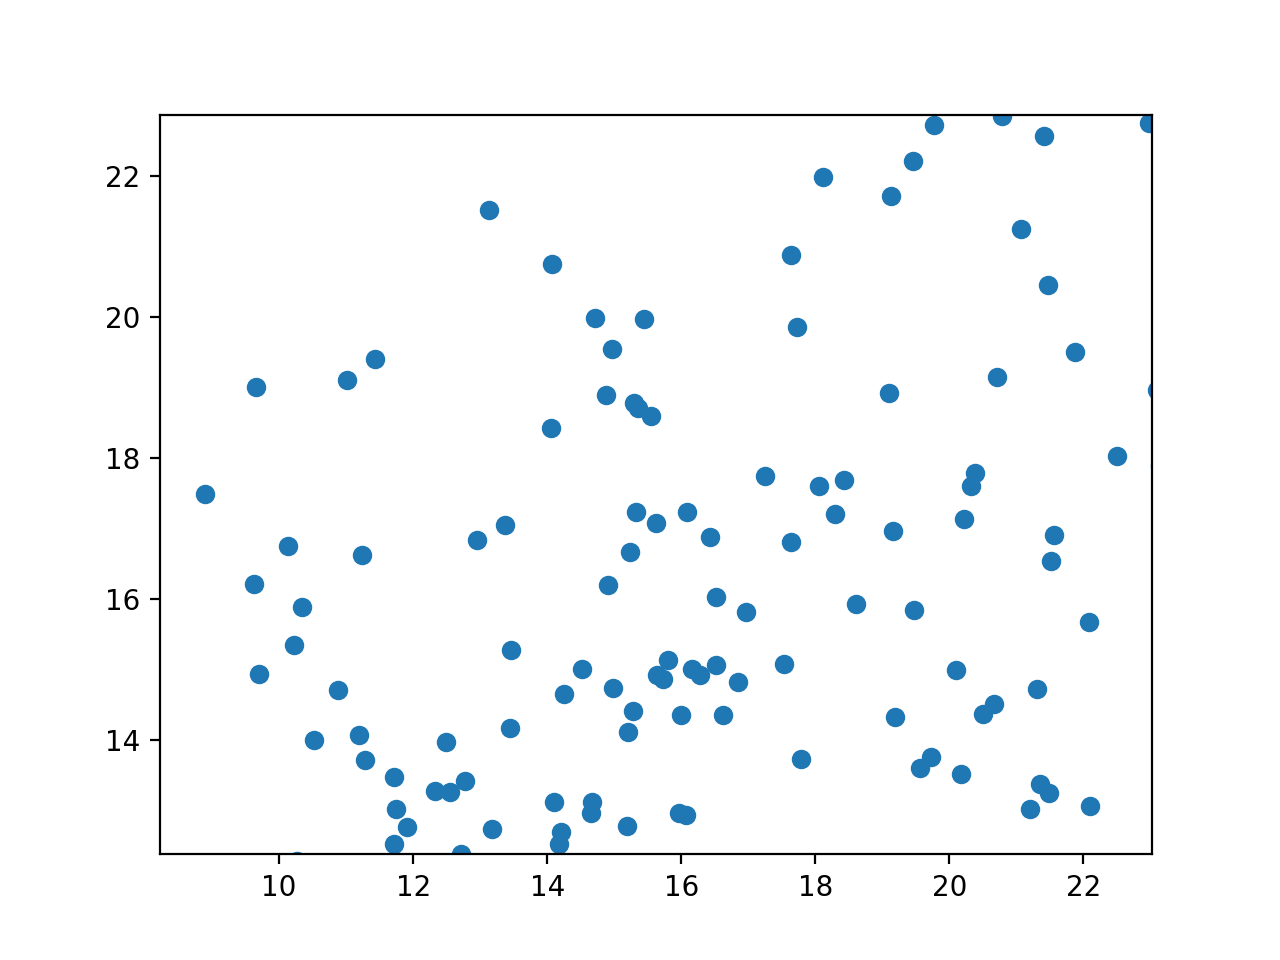

In [38]:
# plot Efficient Frontier
xs = []
ys = []
names = []
for n, rs in alcs_results.items():
    xs.append(rs[1]) # risk 
    ys.append(rs[0]) # return
    names.append(n)
    
risk_vs_ret_plot(xs, ys, names)

In [41]:
corr_df = correlation_df(etfs_real_results)
print(corr_df)

       SYB4   SAAA   GBDV   IDJG    HXS   IWFM   ICLN   EDEN   SPAL   IPDM  \
SYB4  1.000  0.197  0.214  0.169  0.777 -0.446  0.531  0.327  0.346  0.388   
SAAA  0.197  1.000  0.475 -0.027 -0.519  0.384 -0.173 -0.477 -0.514  0.322   
GBDV  0.214  0.475  1.000  0.426  0.202  0.194 -0.557 -0.394  0.312  0.951   
IDJG  0.169 -0.027  0.426  1.000 -0.069  0.606  0.323 -0.048  0.516  0.639   
HXS   0.777 -0.519  0.202 -0.069  1.000 -0.657  0.295  0.593  0.854  0.521   
IWFM -0.446  0.384  0.194  0.606 -0.657  1.000 -0.226 -0.695 -0.624 -0.280   
ICLN  0.531 -0.173 -0.557  0.323  0.295 -0.226  1.000  0.762  0.184 -0.400   
EDEN  0.327 -0.477 -0.394 -0.048  0.593 -0.695  0.762  1.000  0.592 -0.063   
SPAL  0.346 -0.514  0.312  0.516  0.854 -0.624  0.184  0.592  1.000  0.544   
IPDM  0.388  0.322  0.951  0.639  0.521 -0.280 -0.400 -0.063  0.544  1.000   
CHGX  0.993 -0.118  0.502  0.264  0.970 -0.852  0.644  0.806  0.883  0.799   
EWG2  0.956  0.290  0.114 -0.144  0.792 -0.990  0.896  0.976  0.

<IPython.core.display.Javascript object>


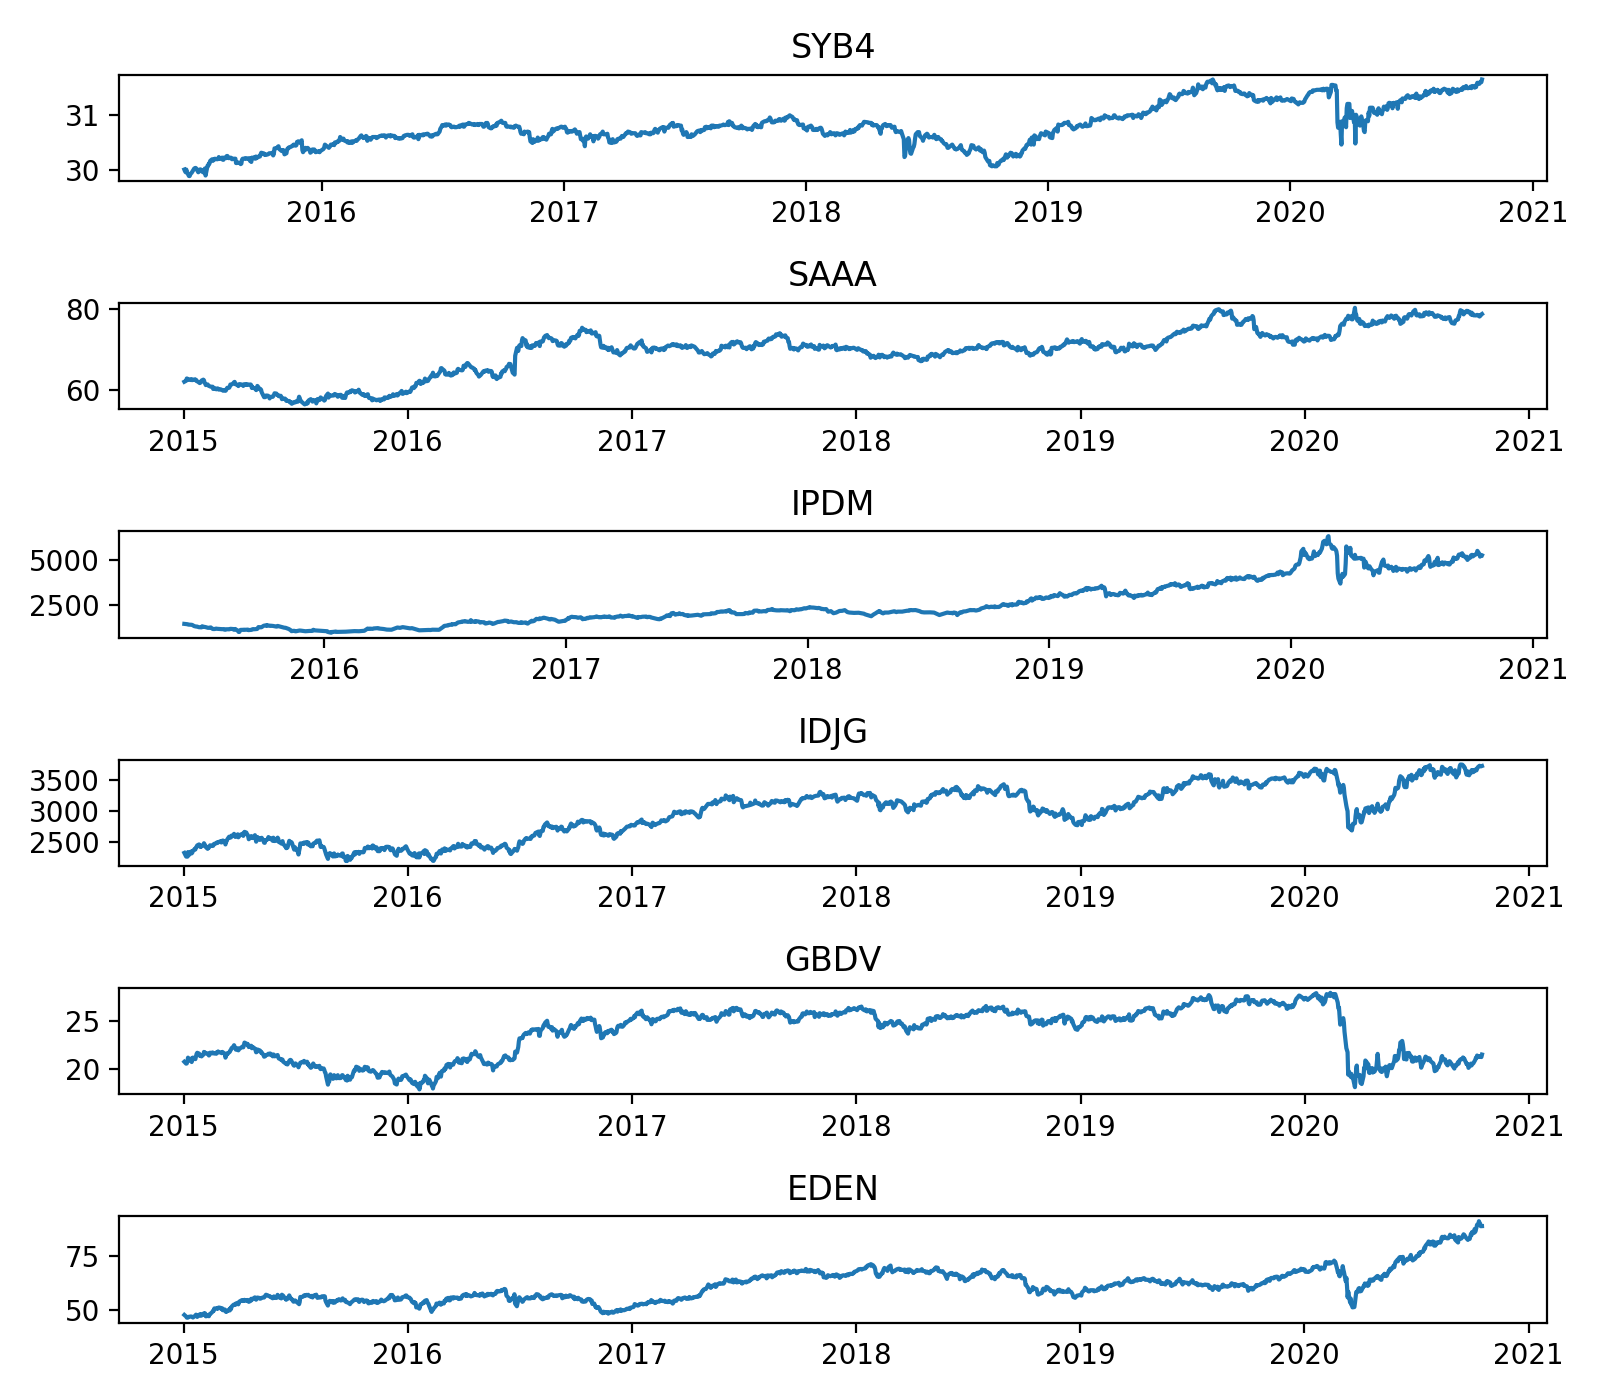

In [40]:
print_stacked_etfs_data(
    ['SYB4','SAAA','IPDM','IDJG','GBDV','EDEN'],
    all_etf_data,
)

In [ ]:
"""
Total: 40k GBP
bo50: 
    - SYB4 -> 10k
    - SAAA -> 10k
co20:
    - IPDM -> 8k
eq30:
    - IDJG -> 4k
    - GBDV -> 4k
    - IWFM -> 4k
    
Aktualnie (As of 2021-03-20)
bo50: 
    - SYB4 -> 5.8k
    - SAAA -> 5.2k
co20:
    - IPDM -> 5.5k
eq30:
    - IDJG -> 5.6k
    - GBDV -> 5.8k
    - IWFM -> 3.1k
    

From 30k -> 40k
- IWFM +1k -> 4.2k
- IPDM +2.5k -> 8k
- SYB4 +3k -> 8.8k
- SAAA +3.5k -> 8.7k

Currencies to convert:
OK GBP: IWFM -> 1k GBP (no fx)
OK USD: IPDM, IAA -> 6k GBP -> ~8.3k USD
OK EUR: SYB4 -> 3k GBP -> ~3.5k EUR

To buy:
OK     1k GBP IWFM
OK   3.5k USD IPDM
OK.  4.8k USD IAAA
OK.  3.5k EUR SYB4
    
""";

In [ ]:
"""
Rebalance/buy at 7th Oct. 2021


Total: 50k GBP
bo50: 
    - SYB4 -> 12.5k
    - SAAA -> 12.5k
co20:
    - IPDM -> 10k
eq30:
    - IDJG -> 7.5k
    - GBDV -> 7.5k
    
    
Aktualnie (As of 2021-10-07)
From 40k -> 50k
bo50: 
    - SYB4 -> 11k     (-1.5k)
    - SAAA -> 11k     (-1.5k) 
co20:
    - IPDM -> 6k      (-4k)
eq30:
    - IDJG -> 6k      (-1.5k) 
    - GBDV -> 6k      (-1.5k)

Currencies to convert:
bo50: 
    - SYB4 -> 1.5k GBP -> EUR: 1750
    - SAAA -> 1.5k GBP -> USD: 2000
co20:
    - IPDM -> 4k GBP ->   USD: 5400
eq30:
    - IDJG -> 1.5k     -> GBP: 1500
    - GBDV -> 1.5k     -> GBP: 1500
                     ------------------ 
                            1750 EUR
                            7400 USD

Orders:
OK - SYB4
- SAAA
- IPDM
OK - IDJG
OK - GBDV

    
"""

In [2]:
"""
Rebalance/buy at 4th Apr. 2022

bo50|co20|eq30_213_SYB4|SAAA|IPDM|IDJG|GBDV|IWFM

From 60k
To 70k
Total: 70k GBP
bo50: 
    - SYB4 -> 25% -> 17.5k
    - SAAA -> 25% -> 17.5k
co20:
    - IPDM -> 20% -> 14k
eq30:
    - IDJG -> 15% -> 10.5k
    - GBDV -> 15% -> 10.5k
    

    
Aktualnie (As of 2022-04-12)
bo50: 
    - SYB4 -> 12.8   (-4.7)
    - SAAA -> 11.9   (-5.6) 
co20:
    - IPDM -> 12     (- 2)
eq30:
    - IDJG -> 7.2k   (-3.3) 
    - GBDV -> 8k     (-2.5)


Available: 10.2k
To buy: 
    3.4k SYB4
    4.3k SAAA
    1.5k IDJG
    1k  GBDV

Currencies to convert:
OK - SYB4 -> 3.4k GBP -> EUR: 4000 
OK - SAAA -> 4.3k GBP -> USD: 5600

Orders:
OK - SYB4
OK - SAAA
OK - IDJG
OK - GBDV

    
""";

In [16]:
for etf in matched_etfs:
    if 'IWFM' in etf['ib_symbols']:
        print(etf)

{'etf': 'iShares MSCI World Momentum Factor UCITS', 'country': 'united kingdom', 'currency': 'GBP', 'stock_exchange': 'London', 'asset_class': 'equity', 'ib_symbols': ['IWFM']}
